# Daten zu Werbeanzeigen auf *Meta*-Plattformen und *Google*

In diesem Notebook schauen wir uns an, wie wir mit dem `R`-Paket [`metatargetr`](https://github.com/favstats/metatargetr/tree/master) Daten zu Werbeanzeigen auf den *Meta*-Plattformen und bei *Google* sammeln können.

Im ersten Schritt laden wir die benötigten `R`-Pakete.

*Hinweis*: Wenn Sie den Code lokal auf Ihrem Rechner ausführen wollen, müssen Sie die Pakete ggf. erst noch installieren.

In [ ]:
library(readr)
library(dplyr)
library(purrr)
library(metatargetr)

## Meta

Nachfolgend sammeln wir Daten aus der [Werbebibliothek von *Meta*](https://www.facebook.com/ads/library). Zur Erinnerung: [Seit Oktober 2025 erlauben *Meta* und *Google* keine politischen Werbeanzeigen auf ihren Plattformen mehr in der EU](https://www.techpolicy.press/meta-and-googles-ad-ban-upends-political-campaigning-in-europe/). Aktuelle Daten zu Anzeigen aus der Kategorie "Wahlwerbung bzw. Werbung zu politisch relevanten Themen" können wir daher nur für Länder außerhalb der EU bekommen.

*Hinweis*: Die Werbebibliothek von *Meta* bietet eine eigene [API](https://www.facebook.com/ads/library/api/?source=onboarding) (auf die z.B. nach Registrierung und Verifizierung über das `R`-Paket [`Radlibrary`](https://facebookresearch.github.io/Radlibrary/articles/Radlibrary.html) zugegriffen werden kann). Das Paket `metatargetr` nutzt allerdings einen Web-Scraping-Ansatz.

### Seiteninformationen

Trotz des Verbots von politischer Werbung auf den *Meta*-Plattformen ist es möglich, über die Werbebibliothek grundlegende Informationen zu den *Facebook*-Profilen/-Seiten politischer Parteien in Deutschland (und anderen EU-Ländern) zu bekommen.

Um Daten zu den Seiten und Werbeanzeigen bestimmter Organisationen zu bekommen, benötigen wir deren "Page ID". Diese finden wir als letzten Parameter in den Suchergebnissen in der *Meta*-Werbebibliothek (`view_all_page_id=`).

Zur Erinnerung hier noch einmal das Beispiel für die "Anatomie" einer URL aus der fünften Seminarsitzung (vom 19.11.2025):

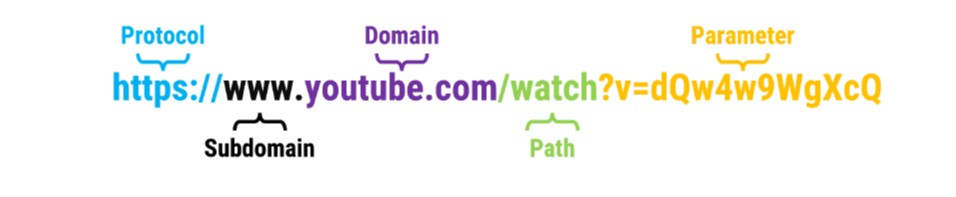

Ähnlich wie in den Beispiel-Notebooks zu *Bluesky*- und [*TikTok*-Daten](https://github.com/jobreu/traktok-demo) können wir Funktionen aus dem Paket `purrr` verwenden, um Daten zu mehreren Seiten zu sammeln und zusammenzuführen.

In [ ]:
pages <- c("47930567748", "78502295414", "21289227249", "47217143218", "47694585682") # page IDs von SPD, CDU, Grüne, FDP, Die Linke

In [ ]:
pages_info <- map_df(pages,
                     ~ get_page_insights(.x,
                                         include_info = "page_info"))

In [ ]:
glimpse(pages_info)

### Targeting Criteria

Für Parteien (und andere politische Organisationen) außerhalb der EU können wir mit Funktionen aus dem Paker `metagargetr` aktuelle Daten zu Targeting Criteria von Werbeanzeigen bekommen. Im folgenden Beispiel machen wir das für die Labour Party und die Conservative Party aus dem Vereinigten Königreich (UK).

In [ ]:
ids <- c("25749647410", "8807334278") # Labour Party, Conservative Party

In [ ]:
targeting_uk <- map_df(ids,
                       ~ get_targeting(id = .x,
                                       timeframe = "LAST_7_DAYS"))

Die Funktion `get_targeting()` bietet zwei Optionen für das Argument `timeframe`: `LAST_7_DAYS` oder `LAST_30_DAYS`.

In [ ]:
glimpse(targeting_uk)

Die gesammelten Daten können wir auch wieder nach dem (aus den vorherigen Sitzungen/Beispiel-Notebooks) bekannten Muster in eine `csv`-Datei schreiben.

In [ ]:
write_csv(targeting_uk, "./targeting_uk.csv")

## Google

Auch für Daten aus der Werbebibliothek von [*Google*](https://adstransparency.google.com/?region=DE) benötigen wir eine Advertiser ID. Diese finden wir ebenfalls über die Suchfunktion. Anders als bei der *Meta*-Werbebibliothek ist die ID allerdings kein Parameter in der URL, sondern der letzte Teil des Pfades (s. Abb. oben).

In [ ]:
google <- ggl_get_spending(advertiser_id = "AR05647100275832389633", # Labour Party
                           start_date = "2025-01-01", 
                           end_date = "2025-12-01",
                           cntry = "UK")

In [ ]:
glimpse(google)

Das Paket `metatargetr` bietet noch einige andere Funktionen zum Sammeln von Daten aus den Werbebibliotheken von *Meta* und *Google*. Den besten Überblick dazu bietet die [Dokumentation zum Paket](https://favstats.github.io/metatargetr/).